In [2]:
# Memuat Dataset MNIST ke Dalam Data Loader:

import torch
from torchvision import datasets, transforms

# Menentukan transformasi data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Memuat dataset MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

# Membuat data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 45934023.24it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30238565.61it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 37332142.51it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 17271558.27it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



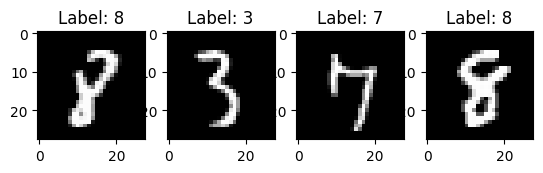

In [3]:
# visualisasi dataset MNIST

import matplotlib.pyplot as plt
import numpy as np

# Ambil satu batch data dari loader pelatihan
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Menampilkan beberapa sampel
num_samples = 4
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[i].numpy().squeeze(), cmap='gray')
    plt.title(f'Label: {labels[i]}')
plt.show()

In [5]:
# KONFIGURASI DEEP NEURAL NETWORK

class DeeperNeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DeeperNeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Lapisan tambahan
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)  # Lapisan tambahan

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

# Model Lebih Dalam
model2 = DeeperNeuralNet(input_size=28*28, hidden_size=128, num_classes=10)

In [7]:
# MEMBUAT HYPERPARAMETER

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.01)

In [9]:
# LOOP TRAIN DAN TRAINING MODEL

num_epochs = 10

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.view(-1, 28*28)
        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.4473
Epoch [2/10], Loss: 0.4709
Epoch [3/10], Loss: 0.4528
Epoch [4/10], Loss: 0.1946
Epoch [5/10], Loss: 0.2353
Epoch [6/10], Loss: 0.0801
Epoch [7/10], Loss: 0.1193
Epoch [8/10], Loss: 0.0300
Epoch [9/10], Loss: 0.2488
Epoch [10/10], Loss: 0.1298


In [11]:
# EVALUASI MODEL

correct = 0
total = 0
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}')

# Sekarang Anda dapat menghitung metrik lain dengan menggunakan y_true dan y_pred
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f'Confusion Matrix:\n{cm}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 94.72
Confusion Matrix:
[[ 962    0    1    2    0    5    8    1    1    0]
 [   0 1121    2    2    0    1    3    1    5    0]
 [   7    3  988    9    7    0    8    4    5    1]
 [   0    1   12  973    0   12    1    6    4    1]
 [   1    2    6    1  914    0   11    1    4   42]
 [   8    3    1   33    4  817    9    0   12    5]
 [  10    3    3    1    7   14  916    1    3    0]
 [   2   11   20   11    5    2    0  946    2   29]
 [   3    8    4   30    7   12   11    5  892    2]
 [  10    9    1   16   15    7    1    4    3  943]]
F1 Score: 0.95
Precision: 0.95
Recall: 0.95


In [ ]:
#================================================================================================================#

In [12]:
# KONFIGURASI LEBIH LEBAR

class WiderNeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(WiderNeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size*2)  # Lebih lebar
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size*2, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Model Lebih Lebar
model3 = WiderNeuralNet(input_size=28*28, hidden_size=128, num_classes=10)


In [13]:
# MEMBUAT HYPERPARAMETER

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=0.01)

In [14]:
# LOOP TRAIN DAN TRAINING MODEL

num_epochs = 10

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.view(-1, 28*28)
        optimizer.zero_grad()
        outputs = model3(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.3752
Epoch [2/10], Loss: 0.3305
Epoch [3/10], Loss: 0.1488
Epoch [4/10], Loss: 0.1461
Epoch [5/10], Loss: 0.2454
Epoch [6/10], Loss: 0.3827
Epoch [7/10], Loss: 0.2131
Epoch [8/10], Loss: 0.1757
Epoch [9/10], Loss: 0.2530
Epoch [10/10], Loss: 0.1329


In [16]:
# EVALUASI MODEL

correct = 0
total = 0
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}')

# Sekarang Anda dapat menghitung metrik lain dengan menggunakan y_true dan y_pred
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f'Confusion Matrix:\n{cm}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 94.83
Confusion Matrix:
[[ 966    0    0    1    0    4    7    1    1    0]
 [   0 1111    2    2    1    2    4    2   11    0]
 [   8    4  975    7    9    2    6    9   11    1]
 [   1    1   12  943    1   23    1   12   11    5]
 [   1    2    4    0  934    0   10    2    2   27]
 [   8    1    1   14    5  829   13    3   12    6]
 [  11    3    3    0    9   10  919    1    2    0]
 [   2    7   20    5    5    2    0  969    2   16]
 [   6    4    3   13    8   15   11    9  900    5]
 [  10    7    1    9   22    6    1   11    5  937]]
F1 Score: 0.95
Precision: 0.95
Recall: 0.95


In [ ]:
#=================================================================================================================#

In [17]:
# KONFIGURASI SEDERHANA

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Model Dasar
model1 = NeuralNet(input_size=28*28, hidden_size=128, num_classes=10)


In [18]:
# MEMBUAT HYPERPARAMETER

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.01)

In [19]:
# LOOP TRAIN DAN TRAINING MODEL

num_epochs = 10

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.view(-1, 28*28)
        optimizer.zero_grad()
        outputs = model1(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.2209
Epoch [2/10], Loss: 0.3701
Epoch [3/10], Loss: 0.3103
Epoch [4/10], Loss: 0.2581
Epoch [5/10], Loss: 0.5042
Epoch [6/10], Loss: 0.3057
Epoch [7/10], Loss: 0.1191
Epoch [8/10], Loss: 0.0958
Epoch [9/10], Loss: 0.0966
Epoch [10/10], Loss: 0.2882


In [21]:
# EVALUASI MODEL

correct = 0
total = 0
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}')

# Sekarang Anda dapat menghitung metrik lain dengan menggunakan y_true dan y_pred
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f'Confusion Matrix:\n{cm}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 94.36
Confusion Matrix:
[[ 956    0    0    2    0    9   10    1    2    0]
 [   0 1113    3    2    0    3    4    2    8    0]
 [   7    4  960    9   11    5   13   11   11    1]
 [   0    1    5  960    1   21    1   12    8    1]
 [   1    2    3    1  942    0   10    2    3   18]
 [   7    2    0   18    4  831   11    3   10    6]
 [   8    3    2    1    9   14  917    1    3    0]
 [   1   12   13   10    5    2    0  968    1   16]
 [   3    8    3   20   10   25   10   11  882    2]
 [   8    9    1   11   42   11    1   16    3  907]]
F1 Score: 0.94
Precision: 0.94
Recall: 0.94


**Hasil kinerja dari ketiga model yang dilakukan oleh neural dasar, deep neural, dan wider neural menunjukkan hasil bahwa akurasi tertinggi didapatkan oleh wider neural. hal ini dikarenakan beberapa kondisi, diantaranya adalah sebagai berikut**

**1. wider neural memiliki Kapasitas Model yang Lebih Besar, sehingga dapat mempelajari pola-pola yang kompleks dalam data**

**2. kemampuan memahami representasi yang lebih luas, diakrenakan model dapat memahami fitur-fitur yang lebih tingkat tinggi yang mungkin terlupakan oleh model yang lebih**